In [105]:
import numpy as np
import cv2  # opencv
from PIL import Image   # PIL == pillow
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import warnings 
warnings.filterwarnings('ignore')

In [107]:
# images are collections of pixels.
cat_img_path = r"D:\Data Science\CNN\images\cats\cat_1.jpg"
cat = Image.open(cat_img_path)

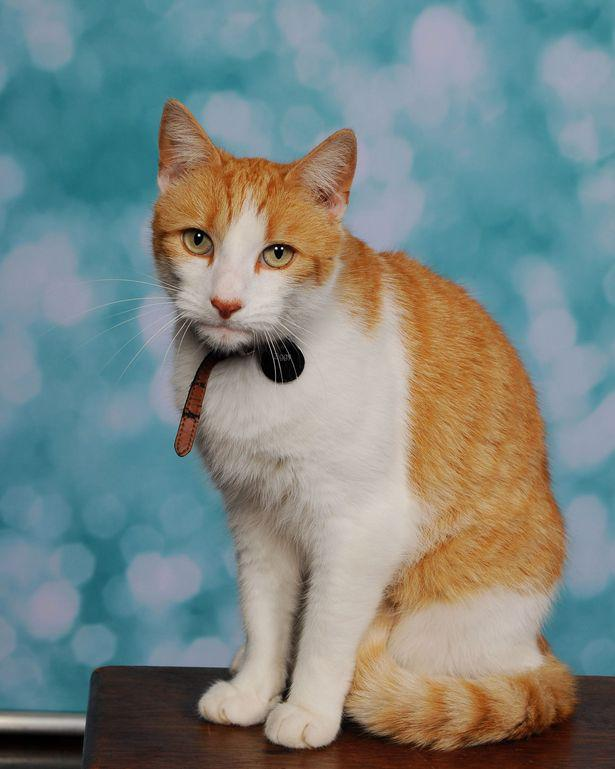

In [108]:
cat

In [109]:
type(cat)

PIL.JpegImagePlugin.JpegImageFile

<h4>How Image look like behind the scene

In [110]:
catINPixel_form = np.array(cat)

In [111]:
# these are pixel values that are in rgb actually 0 - 255 
catINPixel_form

array([[[ 94, 143, 158],
        [ 94, 143, 158],
        [ 97, 143, 159],
        ...,
        [ 83, 147, 159],
        [ 84, 148, 160],
        [ 85, 149, 161]],

       [[ 92, 141, 156],
        [ 93, 142, 157],
        [ 96, 142, 158],
        ...,
        [ 82, 146, 158],
        [ 84, 148, 160],
        [ 84, 148, 160]],

       [[ 90, 139, 154],
        [ 91, 140, 155],
        [ 94, 140, 155],
        ...,
        [ 82, 146, 158],
        [ 83, 147, 159],
        [ 84, 148, 160]],

       ...,

       [[ 43,  45,  42],
        [ 40,  45,  41],
        [ 41,  43,  40],
        ...,
        [ 58,  43,  40],
        [ 58,  43,  40],
        [ 58,  43,  40]],

       [[ 38,  40,  37],
        [ 35,  40,  36],
        [ 35,  37,  34],
        ...,
        [ 53,  38,  35],
        [ 51,  36,  33],
        [ 50,  35,  32]],

       [[ 35,  35,  35],
        [ 34,  36,  35],
        [ 35,  35,  35],
        ...,
        [ 54,  39,  36],
        [ 53,  38,  35],
        [ 58,  43,  40]]

In [112]:
catINPixel_form.shape   

# (height, width ,length)

(769, 615, 3)

In [113]:
catINPixel_form.ndim

3

In [114]:
catINPixel_form.min()

0

# Now we read all images using there path .But we organize path using python.

In [115]:
# path_dict = {'cats':[], 'dogs':[]}

cat_path_list = []

for i in range(605):
    cats_path = f"D:\Data Science\CNN\images\cats\cat_{i+1}.jpg"
    cat_path_list.append(cats_path)


In [116]:
dog_path_list = []

for i in range(605):
    dog_path = f"D:\Data Science\CNN\images\dogs\dog_{i}.jpg"
    dog_path_list.append(dog_path)

In [117]:
path_dict = {'cats':cat_path_list, 'dogs':dog_path_list}
path_dict

{'cats': ['D:\\Data Science\\CNN\\images\\cats\\cat_1.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_2.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_3.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_4.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_5.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_6.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_7.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_8.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_9.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_10.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_11.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_12.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_13.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_14.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_15.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_16.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_17.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_18.jpg',
  'D:\\Data Science\\CNN\\images\\cats\\cat_19.

# But because dog and cat paths are not regular . So we do not take this approach

In [118]:
# Base directory containing the images
base_directory = r'./images'

# Iterate through the cat images directory
cat_dir = os.path.join(base_directory, 'cats')
cat_dir

'./images\\cats'

In [119]:
import os

# Initialize the dictionary with directory paths
path_dict = {'cats': [], 'dogs': []}

# Base directory containing the images
base_directory = r'./images'

# Iterate through the cat images directory
cat_dir = os.path.join(base_directory, 'cats')
for file in os.listdir(cat_dir):
    file_path = os.path.join(cat_dir, file)
    path_dict['cats'].append(file_path)

# Iterate through the dog images directory
dog_dir = os.path.join(base_directory, 'dogs')
for file in os.listdir(dog_dir):
    file_path = os.path.join(dog_dir,file)
    path_dict['dogs'].append(file_path)


# or by simple list comprehension
path_dict = {
    'cats': [os.path.join(cat_dir, file) for file in os.listdir(cat_dir) if file.endswith(('.png', '.jpg', '.jpeg'))],
    'dogs': [os.path.join(dog_dir, file) for file in os.listdir(dog_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]
}

In [120]:
os.listdir('./images')

['cats', 'dogs']

In [121]:
len(path_dict['cats'])

349

In [122]:
len(path_dict['dogs'])

348

In [123]:
# from pathlib import Path

# path_dict = {
#     "cats": [],
#     "dogs": []
# }
# base_directory = r"./Data/images"
# for dir_name in os.listdir(base_directory):
#     dir_path = Path(os.path.join(base_directory, dir_name))
#     if dir_path.is_dir(): 
#         for image_name in os.listdir(dir_path):
#             image_path = os.path.join(dir_path, image_name)
#             print(image_path)
#             if dir_name in path_dict:
#                 path_dict[dir_name].append(image_path)
# print(path_dict)

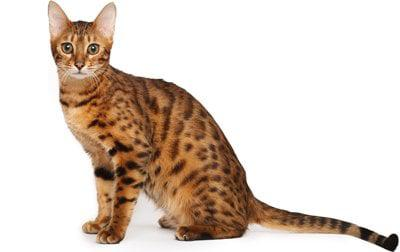

In [124]:
Image.open(path_dict['cats'][25])

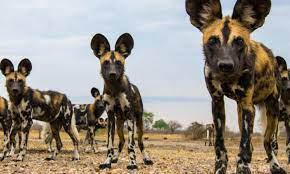

In [125]:
Image.open(path_dict['dogs'][25])

<h3>Now we divide data into x and y 
<p>For example ,we consider this for one image

In [126]:
sample_image = cv2.imread(path_dict['dogs'][25])   #convert into 3d array
sample_image.shape

(174, 290, 3)

Now we make size of all image same

In [127]:
reduced_img = cv2.resize(sample_image,(224,224))
reduced_img.shape

(224, 224, 3)

In [128]:
x = []  #img in array reduce the size
y = []  #label

# for item in range(len(path_dict['cats'])):
#     sample_image = cv2.imread(path_dict['cats'][item])
#     reduced_img = cv2.resize(sample_image,(224,224))
#     x.append(reduced_img)
#     y.append('cat')


# for item in range(len(path_dict['dogs'])):
#     sample_image = cv2.imread(path_dict['dogs'][item])
#     reduced_img = cv2.resize(sample_image,(224,224))
#     x.append(reduced_img)
#     y.append('dog')


# or

for class_name , paths in path_dict.items():
    for path in paths:
        sample_image = cv2.imread(path)
        reduced_img = cv2.resize(sample_image,(224,224))
        x.append(reduced_img)
        y.append(class_name)


In [129]:
len(x), len(y)

(697, 697)

In [130]:
set(y)

{'cats', 'dogs'}

In [131]:
# i=0
# for item in y:
#     if item == 'cats':
#         y[i]=1
#     else:
#         y[i]=0
#     i+=1

y = [1 if item == 'cats' else 0 for item in y]

In [132]:
set(y)

{0, 1}

In [133]:
type(x), type(y)

(list, list)

In [134]:
x = np.array(x)
y = np.array(y)

In [135]:
x.ndim , y.ndim

(4, 1)

In [136]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [137]:
x.shape

(697, 224, 224, 3)

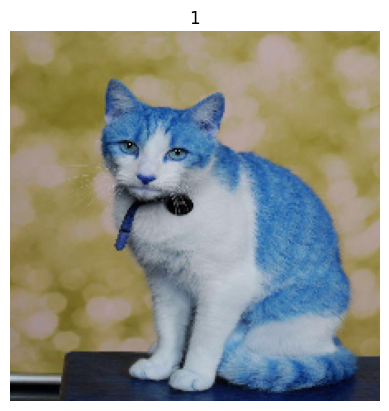

In [138]:
plt.imshow(x[0])
plt.title(y[0])
plt.axis('off')
plt.show()

In [139]:
x[4].shape

(224, 224, 3)

creating a random image

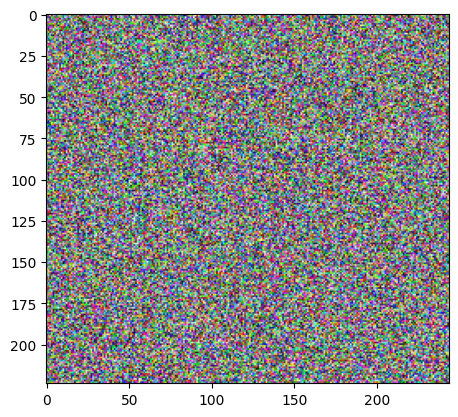

In [140]:
plt.imshow(np.random.randint(0,255,(224,244,3)))

In [141]:
# 0 - 255 ==> 0 - 1

X = x/255.0
X

array([[[[0.61176471, 0.55294118, 0.36078431],
         [0.62352941, 0.56470588, 0.4       ],
         [0.62352941, 0.56862745, 0.43921569],
         ...,
         [0.59607843, 0.55686275, 0.29411765],
         [0.61176471, 0.56470588, 0.31372549],
         [0.62745098, 0.58039216, 0.32941176]],

        [[0.59215686, 0.53333333, 0.34117647],
         [0.60784314, 0.54901961, 0.38039216],
         [0.61568627, 0.56078431, 0.41960784],
         ...,
         [0.59215686, 0.54901961, 0.29411765],
         [0.60392157, 0.55686275, 0.30196078],
         [0.61568627, 0.56862745, 0.31764706]],

        [[0.58823529, 0.53333333, 0.3372549 ],
         [0.60784314, 0.55294118, 0.37647059],
         [0.60784314, 0.54901961, 0.4       ],
         ...,
         [0.59215686, 0.54509804, 0.29411765],
         [0.6       , 0.55294118, 0.30196078],
         [0.61568627, 0.56862745, 0.31764706]],

        ...,

        [[0.31764706, 0.35294118, 0.38823529],
         [0.30196078, 0.3372549 , 0.37254902]

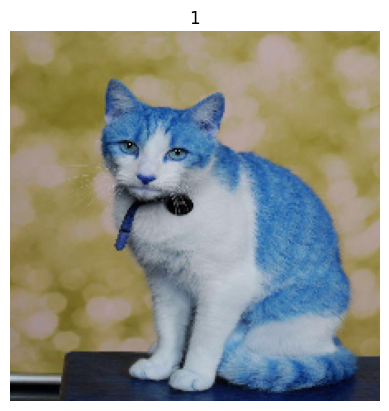

In [142]:
plt.imshow(x[0])
plt.title(y[0])
plt.axis('off')
plt.show()

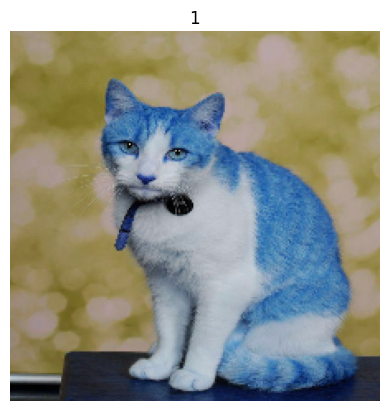

In [143]:
plt.imshow(X[0])
plt.title(y[0])
plt.axis('off')
plt.show()

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [147]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((592, 224, 224, 3), (105, 224, 224, 3), (592,), (105,))

In [148]:
# cnn model defining
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Conv2D

In [149]:
cnn_model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(40, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print model summary for detailed overview
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 40)   │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        11,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,574,345 (21.26 MB)

 Trainable params: 5,574,345 (21.26 MB)

 Non-trainable params: 0 (0.00 B)

In [152]:
# model training
history = cnn_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8369 - loss: 0.3656 - val_accuracy: 0.6095 - val_loss: 1.1209
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8867 - loss: 0.2641 - val_accuracy: 0.6286 - val_loss: 0.8560
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9584 - loss: 0.2221 - val_accuracy: 0.6476 - val_loss: 1.3353
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9759 - loss: 0.1140 - val_accuracy: 0.6667 - val_loss: 1.5067
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9955 - loss: 0.0345 - val_accuracy: 0.6286 - val_loss: 2.6701
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9923 - loss: 0.0332 - val_accuracy: 0.6667 - val_loss: 2.2569
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.6762 - val_loss: 2.4475
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.6571 - val_loss:

In [154]:
import pandas as pd
# pd.Dataframe(history.history.histplot())

In [155]:
prediction = cnn_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step


In [156]:
prediction.shape,  x_test.shape

((105, 1), (105, 224, 224, 3))

In [157]:
pred = (prediction>0.5).astype(int).ravel()

In [158]:
pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [161]:
compare_df = pd.DataFrame({"Actual":y_test,"Prediction":pred})
compare_df.head()

,Actual,Prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1


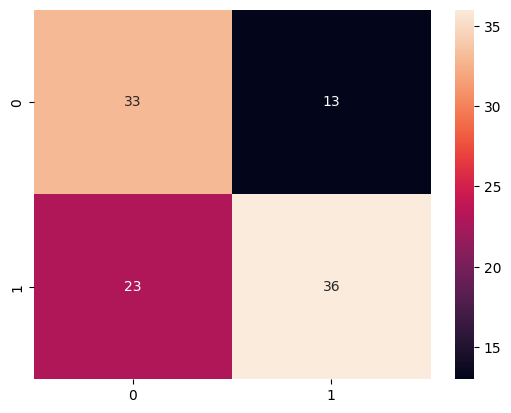

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        46
           1       0.73      0.61      0.67        59

    accuracy                           0.66       105
   macro avg       0.66      0.66      0.66       105
weighted avg       0.67      0.66      0.66       105



In [164]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(compare_df['Actual'],compare_df['Prediction'])

sns.heatmap(matrix,annot=True, fmt='d')
plt.show()

# classification report

print(classification_report(compare_df['Actual'],compare_df['Prediction']))

In [166]:
compare_df['Actual'].map({1:'Cat', 0:'Dog'})

0      Cat
1      Dog
2      Dog
3      Cat
4      Cat
      ... 
100    Dog
101    Cat
102    Dog
103    Cat
104    Cat
Name: Actual, Length: 105, dtype: object

In [168]:
compare_df['Prediction'].map({1:'Cat', 0:'Dog'})

0      Dog
1      Cat
2      Dog
3      Cat
4      Cat
      ... 
100    Dog
101    Cat
102    Dog
103    Dog
104    Cat
Name: Prediction, Length: 105, dtype: object

In [169]:
# model saving
import os
os.makedirs('prediction',exist_ok=True)
os.makedirs('models',exist_ok=True)

compare_df.to_csv('./prediction/predicted.csv',index=False)
cnn_model.save('./models/cnn_model.h5')
print("successfully saved your models")

successfully saved your models
